In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

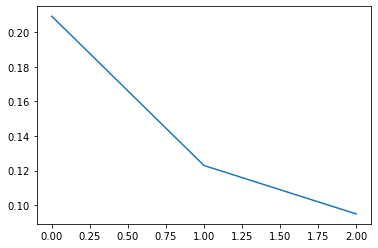

In [6]:
dt_heart = pd.read_csv("./heart.csv")
# print(dt_heart.head(5))

X = dt_heart.drop(['target'],axis=1)
y = dt_heart['target']

## Sobre escribimos la variable con datos estandarizados
X = StandardScaler().fit_transform(X)
    
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Por defecto el numero de componentes es igual
# al minimo de numero de muestras y minimo de features
# es decir mismo numero de columnas y de componentes
pca = PCA(n_components=3)
pca.fit(X_train)

## No manda todos los datos a entrenar al tiempo,
# por eso va entrenandolos poco a poco
ipca = IncrementalPCA(n_components=3,batch_size=10)
ipca.fit(X_train)

plt.plot(range(len(pca.explained_variance_)),pca.explained_variance_ratio_)
plt.show()

In [7]:
logistic = LogisticRegression(solver='lbfgs')

dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
logistic.fit(dt_train,y_train)
print('SCORE PCA: ' , logistic.score(dt_test,y_test))
    
dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train,y_train)
print('SCORE PCA: ' , logistic.score(dt_test,y_test))

SCORE PCA:  0.7857142857142857
SCORE PCA:  0.8051948051948052


In [8]:
from sklearn.decomposition import KernelPCA

In [9]:
kpca = KernelPCA(n_components=4,kernel = "poly")
kpca.fit(X_train)

dt_train = kpca.transform(X_train)
dt_test = kpca.transform(X_test)

logistic = LogisticRegression(solver='lbfgs')
logistic.fit(dt_train,y_train)

print(f'PCA Kernel Score: {logistic.score(dt_test,y_test)}')

PCA Kernel Score: 0.7987012987012987
